
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Sample Dataset :-



https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

!apt-get install -y fonts-arial

# Use a different font
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-arial


In [ ]:
df1 = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

In [ ]:
df1.sample(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22191,42,entrepreneur,married,university.degree,unknown,yes,yes,cellular,aug,thu,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
27837,70,retired,married,basic.4y,no,yes,no,cellular,mar,mon,...,6,999,1,failure,-1.8,92.843,-50.0,1.629,5099.1,no
15778,27,blue-collar,single,basic.9y,no,yes,yes,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
33432,25,technician,married,university.degree,no,no,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
27310,58,admin.,divorced,university.degree,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
6948,37,admin.,married,high.school,unknown,yes,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
2717,42,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
1737,36,unemployed,single,basic.4y,unknown,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
39368,58,services,married,high.school,no,no,no,cellular,mar,mon,...,1,999,2,failure,-1.8,93.369,-34.8,0.635,5008.7,no
26238,40,services,single,basic.6y,no,no,no,cellular,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df1.shape

(41188, 21)

In [ ]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df1.duplicated().sum()

12

In [ ]:
df1 = df1.groupby(df1.columns.tolist(),as_index=False).mean()

In [ ]:
df1.duplicated().sum()

0

In [ ]:
cat_cols = df1.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df1.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


<Axes: xlabel='age', ylabel='Count'>

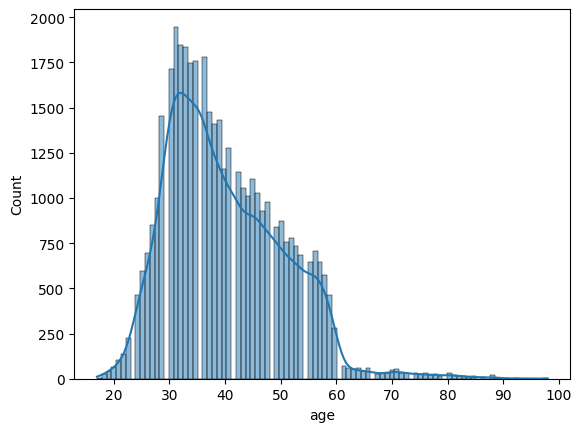

In [ ]:
# histplot of age:
# kde:
sns.histplot(df1['age'], kde=True)

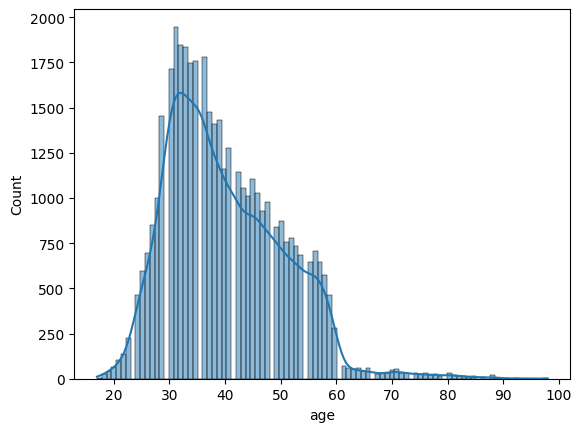

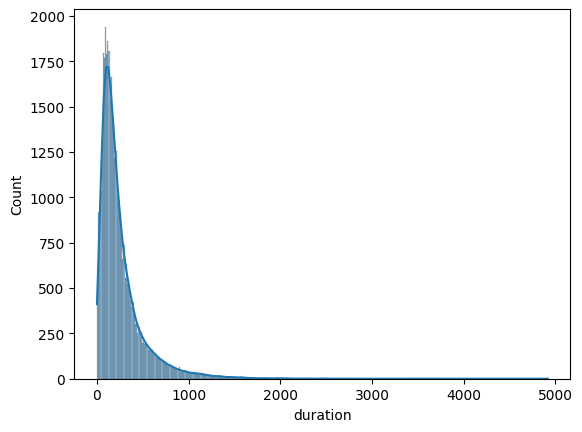

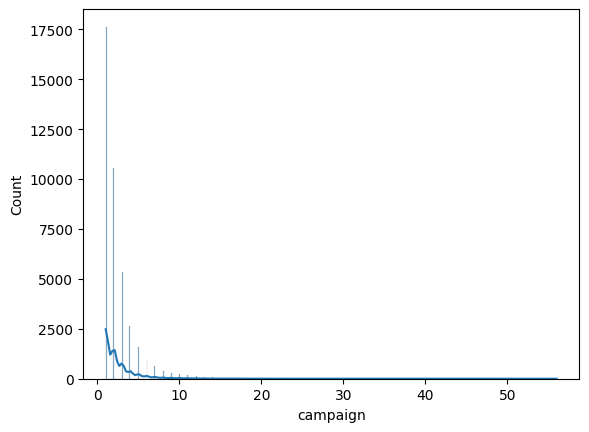

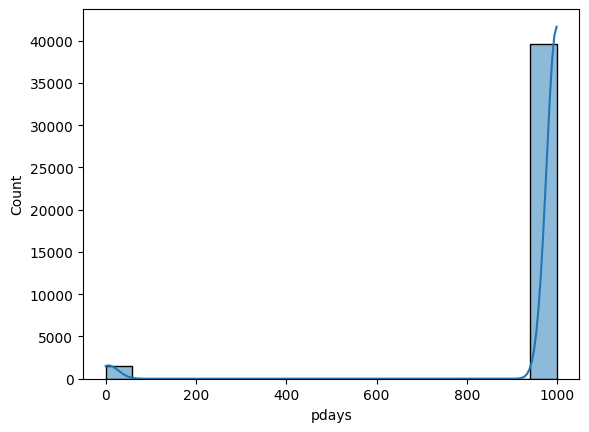

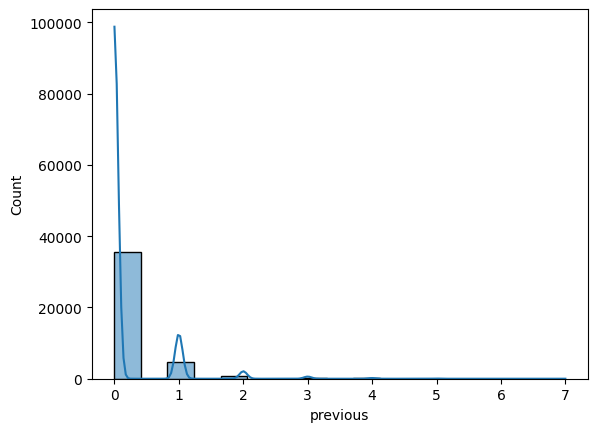

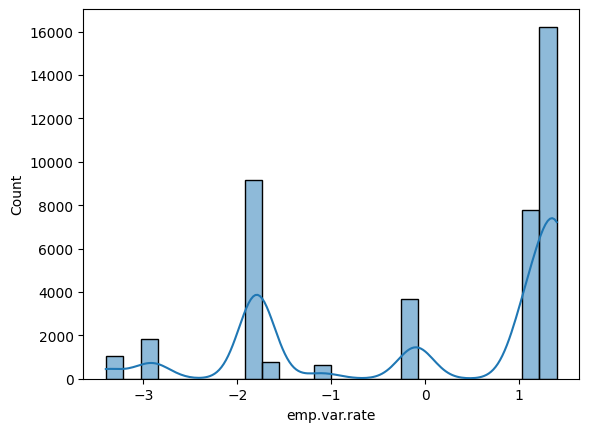

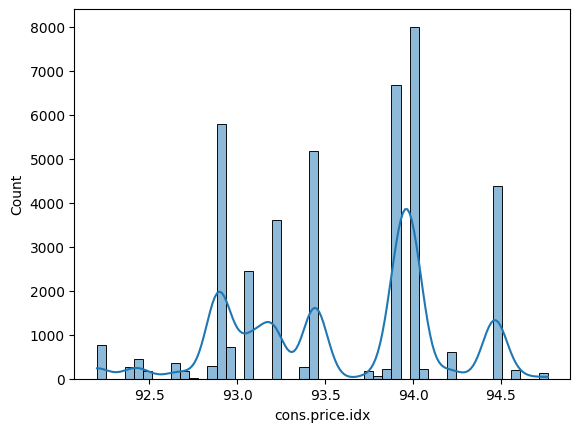

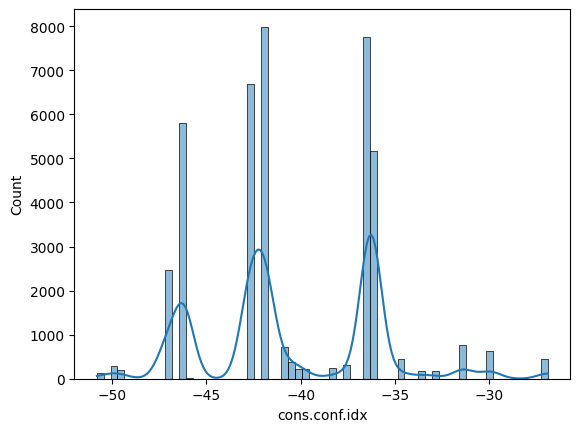

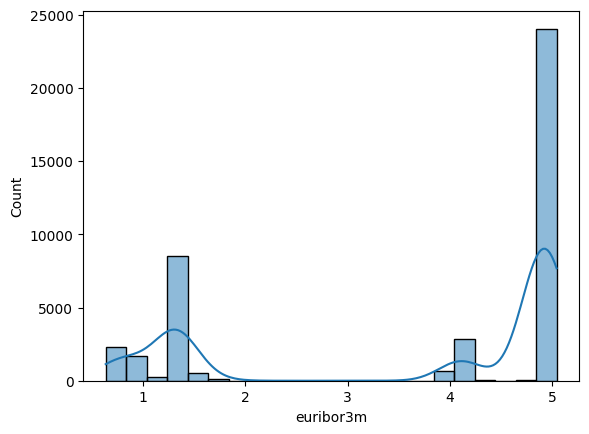

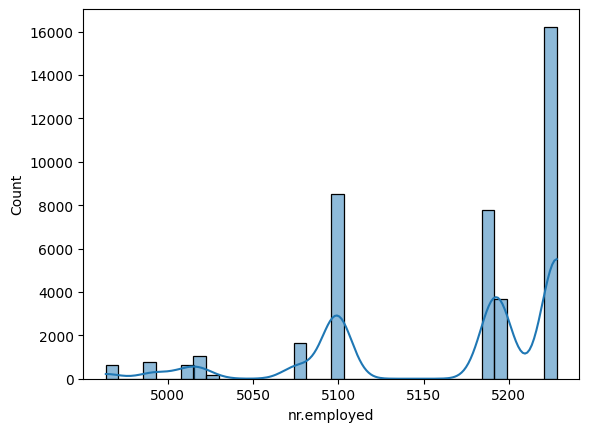

In [ ]:
# all numerical columns histplot
for col in num_cols:
    sns.histplot(df1[col], kde=True)
    plt.show()

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


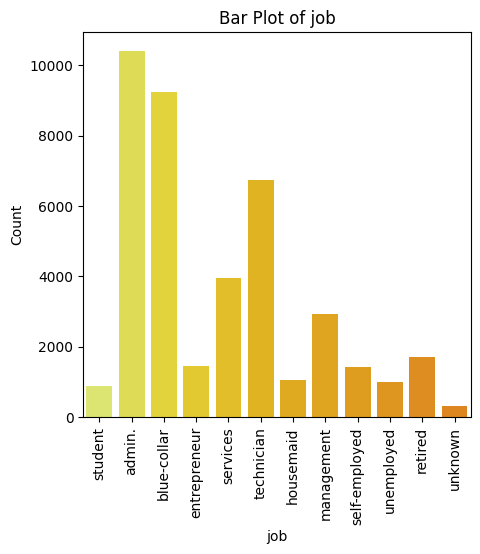

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


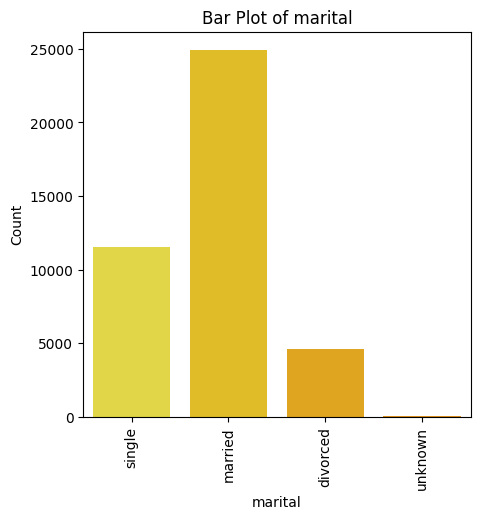

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


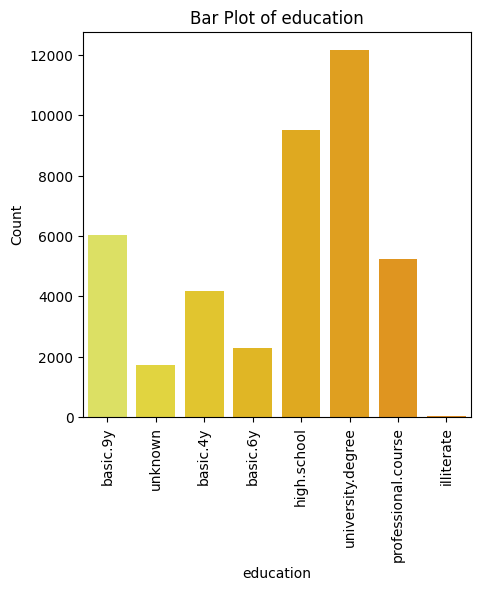

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


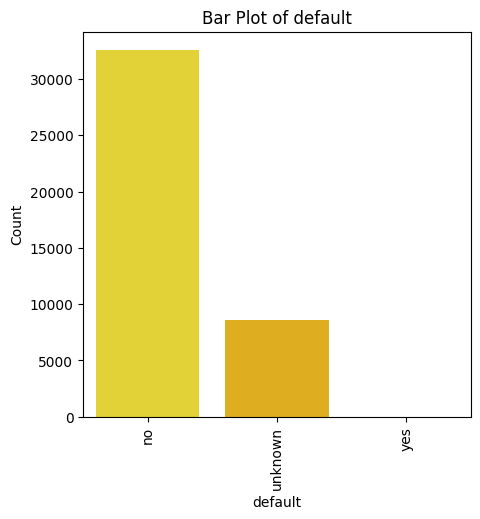

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


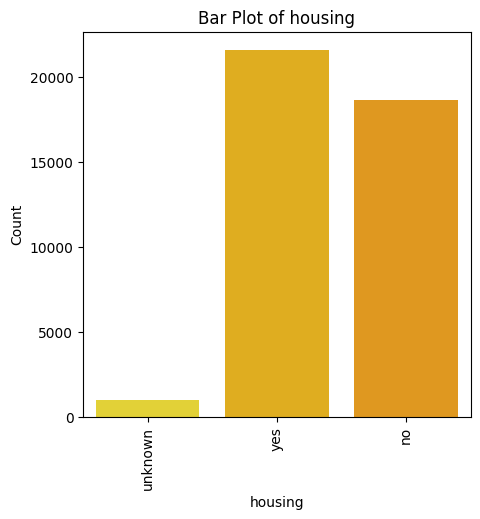

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


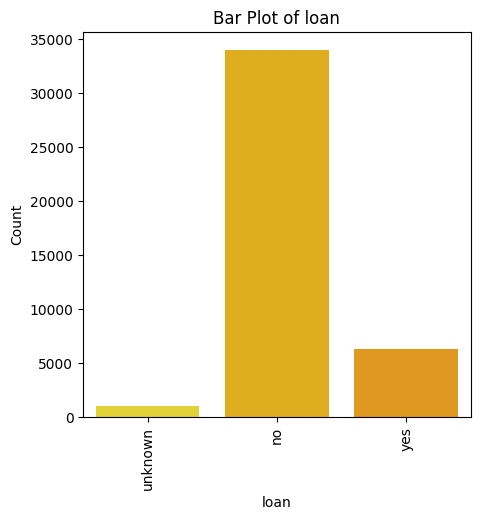

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


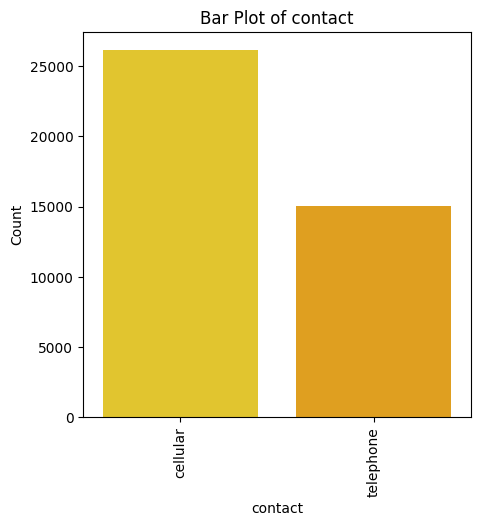

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


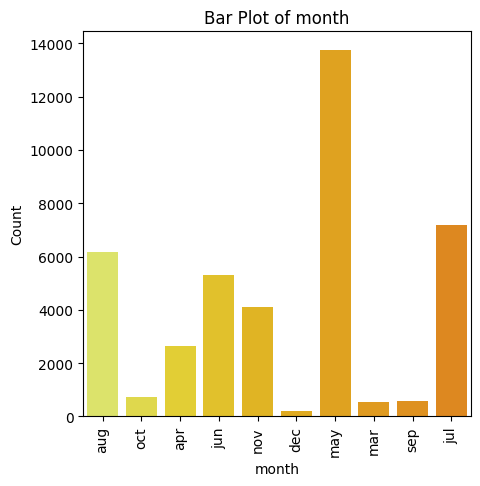

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


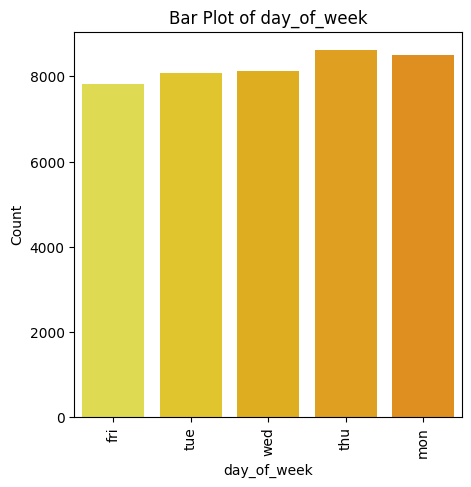

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


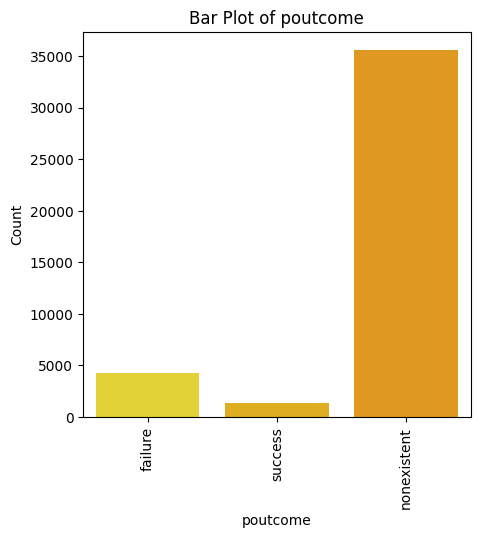

<ipython-input-14-9711eb344607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df1, palette='Wistia')


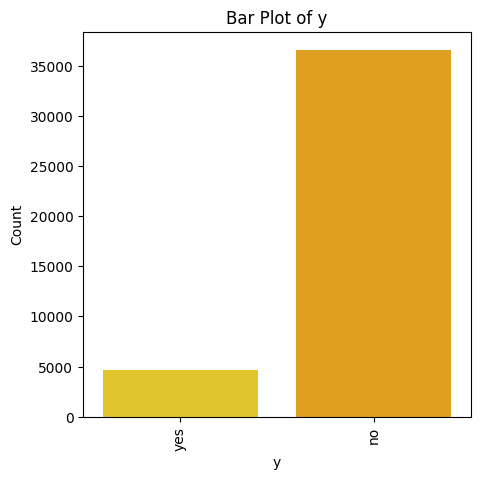

In [ ]:
# bar plot for categorical columns
for feature in cat_cols:
    plt.figure(figsize=(5,5))  # Adjust the figure size as needed
    sns.countplot(x=feature, data=df1, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

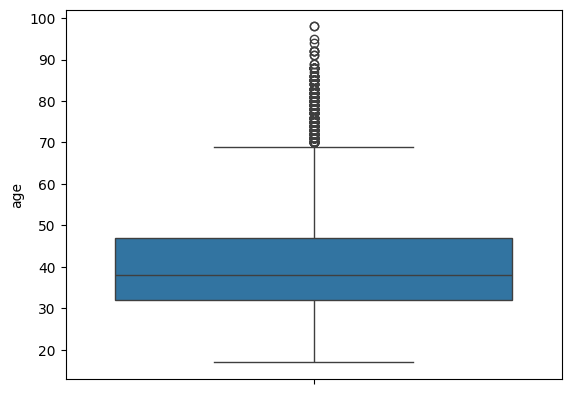

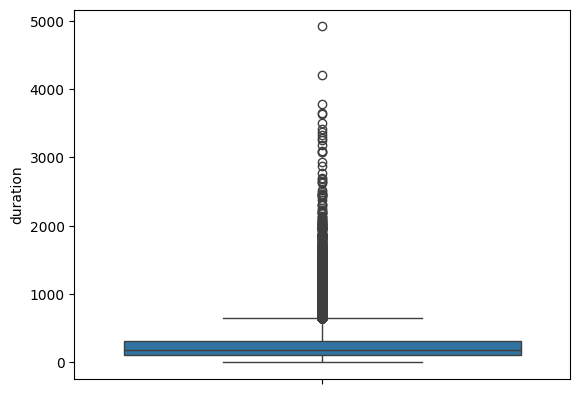

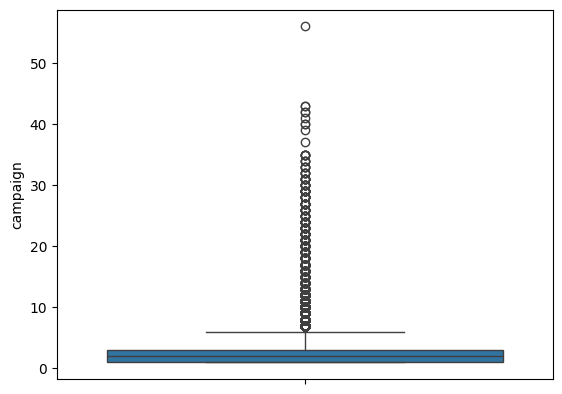

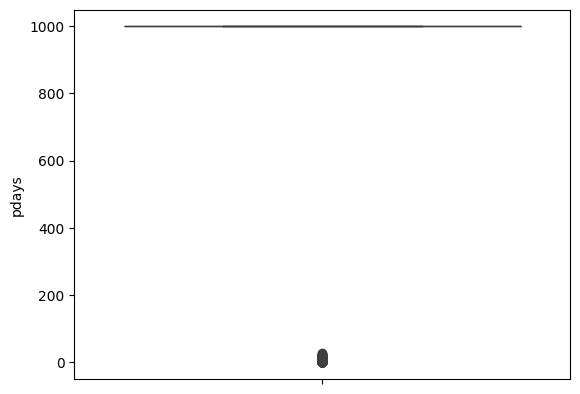

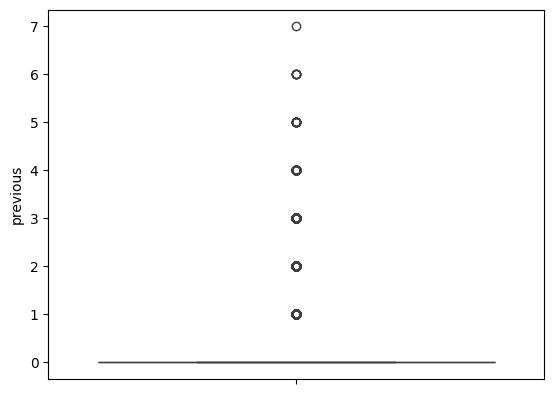

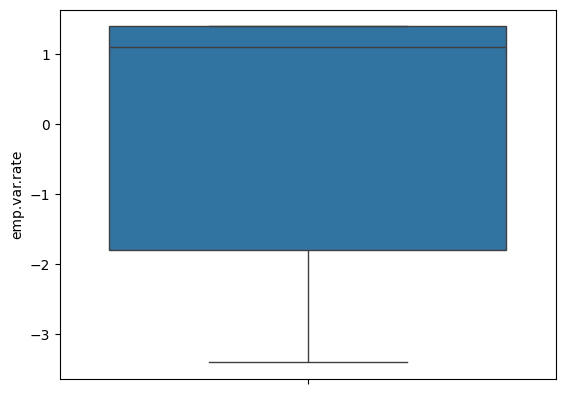

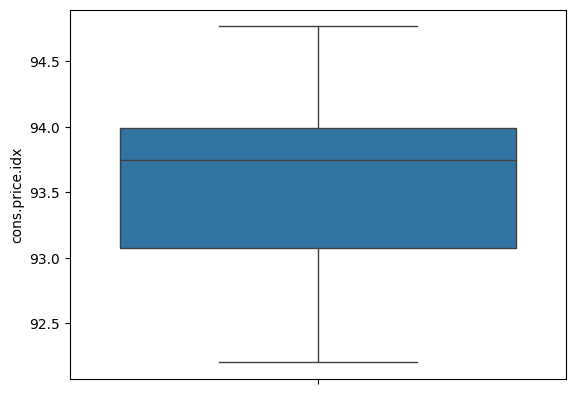

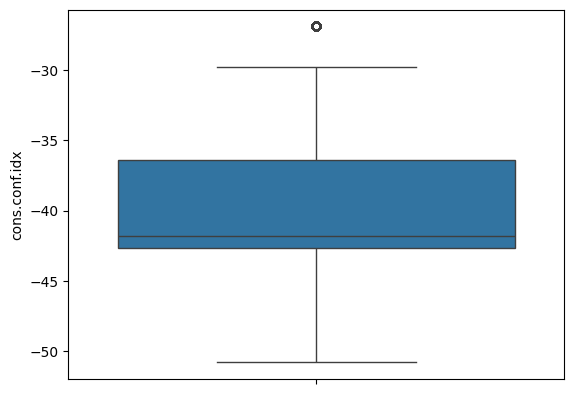

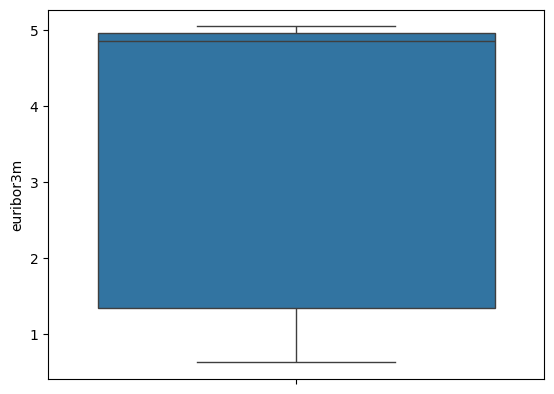

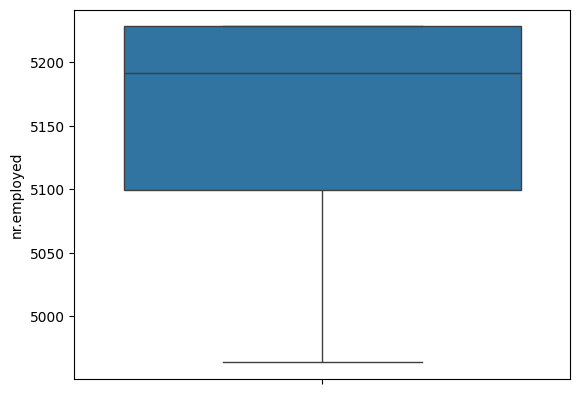

In [ ]:
# box plot of all numerical columns
for col in num_cols:
    sns.boxplot(df1[col])
    plt.show()

In [ ]:
df1[num_cols].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


<Axes: >

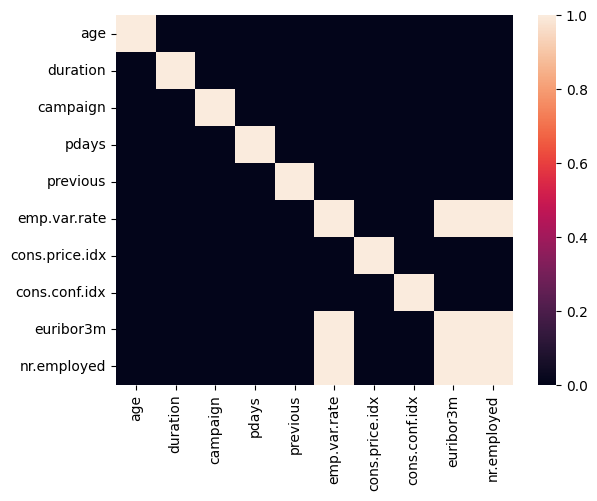

In [ ]:
# heatmap of this correlation
sns.heatmap(df1[num_cols].corr()>0.9)

In [ ]:
# label encoder on the output column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['y'] = le.fit_transform(df1['y'])

In [ ]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,1
1,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,0
2,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,0
3,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,1
4,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,0


In [ ]:
# values in education column
df1['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [ ]:
# ordinal encoding on the education column

# Illiterate is the least important, so it gets the lowest number, 1.
# University.degree is the most important, so it gets the highest number, 8.
from sklearn.preprocessing import OrdinalEncoder

categories = [['illiterate', 'unknown', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']]
enc = OrdinalEncoder(categories = categories)
df1['education'] = enc.fit_transform(df1[['education']])

In [ ]:
# ordinal encoding on the job column
# the order of importance for job categories is as follows:
# more important = higher number
categories = [['unknown', 'student','unemployed','retired','housemaid', 'blue-collar', 'services', 'self-employed', 'technician', 'admin.', 'entrepreneur', 'management']]
enc = OrdinalEncoder(categories = categories)
df1['job'] = enc.fit_transform(df1[['job']])

In [ ]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,17,1.0,single,4.0,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,1
1,17,1.0,single,4.0,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,0
2,17,1.0,single,4.0,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,0
3,17,1.0,single,1.0,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,1
4,17,1.0,single,1.0,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,0


In [ ]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df1['duration']

0        498
1         92
2        182
3        896
4        432
        ... 
41171    271
41172    134
41173     85
41174    272
41175    476
Name: duration, Length: 41176, dtype: int64

In [ ]:
# one hot encoding on the columns = marital, housing, loan, contact, month, day_of_week, poutcome
df1 = pd.get_dummies(df1, columns = ['marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [ ]:
df1.head()

,age,job,education,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,17,1.0,4.0,no,498,2,999,1,-2.9,92.201,...,False,False,True,False,False,False,False,True,False,False
1,17,1.0,4.0,no,92,3,4,2,-2.9,92.201,...,False,False,True,False,False,False,False,False,False,True
2,17,1.0,4.0,no,182,2,999,2,-2.9,92.201,...,False,False,True,False,False,False,False,True,False,False
3,17,1.0,1.0,no,896,1,2,2,-3.4,92.431,...,True,False,False,False,False,True,False,False,False,True
4,17,1.0,1.0,no,432,3,4,2,-2.9,92.201,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
df1.head()

,age,job,education,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,17,1.0,4.0,no,498,2,999,1,-2.9,92.201,...,False,False,True,False,False,False,False,True,False,False
1,17,1.0,4.0,no,92,3,4,2,-2.9,92.201,...,False,False,True,False,False,False,False,False,False,True
2,17,1.0,4.0,no,182,2,999,2,-2.9,92.201,...,False,False,True,False,False,False,False,True,False,False
3,17,1.0,1.0,no,896,1,2,2,-3.4,92.431,...,True,False,False,False,False,True,False,False,False,True
4,17,1.0,1.0,no,432,3,4,2,-2.9,92.201,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
df1.shape

(41176, 44)

In [ ]:
df1.replace(['yes', 'true'], 1, inplace=True)
df1.replace(['no', 'unknown', 'false'], 0, inplace=True)

In [ ]:
df1.head()

,age,job,education,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,17,1.0,4.0,0,498,2,999,1,-2.9,92.201,...,False,False,True,False,False,False,False,True,False,False
1,17,1.0,4.0,0,92,3,4,2,-2.9,92.201,...,False,False,True,False,False,False,False,False,False,True
2,17,1.0,4.0,0,182,2,999,2,-2.9,92.201,...,False,False,True,False,False,False,False,True,False,False
3,17,1.0,1.0,0,896,1,2,2,-3.4,92.431,...,True,False,False,False,False,True,False,False,False,True
4,17,1.0,1.0,0,432,3,4,2,-2.9,92.201,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
X = df1.drop('y', axis=1)
y = df1['y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
y_pred = dt.predict(X_test)
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9125789218067023

In [ ]:
# precision, recall, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6222493887530562
Recall: 0.5532608695652174
F1 Score: 0.5857307249712314


In [ ]:
# make decison tree
# with column names
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
# dtreeviz visualization
!pip install dtreeviz

In [ ]:
import graphviz.backend as be
import dtreeviz

In [ ]:
viz = dtreeviz.model(dt,
                     X_train,
                     y_train,
                     target_name='y',
                     feature_names=X.columns)
viz

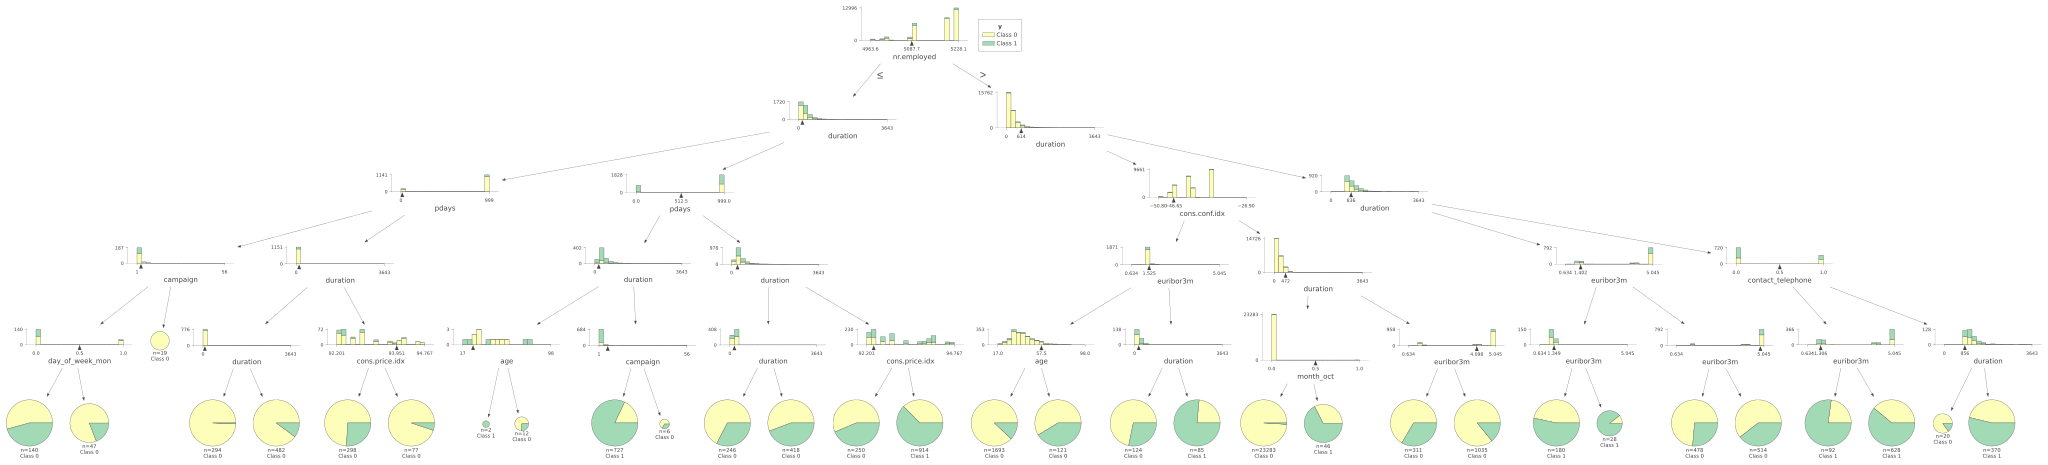

In [49]:
# view visualization

import warnings
import logging

# Suppress specific font warning using warnings
warnings.filterwarnings("ignore", message="findfont: Font family 'Arial' not found")

# Suppress warnings from matplotlib.font_manager using logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

viz.view()